### Use Assignment 2.10 as a template

Gradient descent is backbone of machine learning. Gradient descent is by far the most popular optimization strategy, used in machine learning and deep learning at the moment. It is used while training your model, can be combined with every algorithm and is easy to understand and implement. Therefore, everyone who works with Machine Learning should understand it’s concept

Optimization is the technique to improve the performance of model. Optimization allows us to select the best parameters, associated with the machine learning algorithm or method we are using, for our problem case. Optimization refers to the tsak of minimizing/maximizing an objective function $f(x)$ parameterized by $x$. In machine learning terminology, it is the task of minimizing the cost/loss function $J(\theta)$ parameterized by the model's parameters $\theta \epsilon R^d$. Optimization algortihms have the following goals:

- Find the global minimum of the objective function. This is feasible if the objective function is convex, i.e., any local minimum is a global minimum.

- Find the lowest possible value of the objective function within its neighborhood. That’s usually the case if the objective function is not convex as the case in most deep learning problems.

There are three kinds of optimization algorithms:

- Optimization algorithm that is not iterative and simply solves for one point.

- Optimization algorithm that is iterative in nature and converges to acceptable solution regardless of the parameters initialization such as gradient descent applied to logistic regression.

- Optimization algorithm that is iterative in nature and applied to a set of problems that have non-convex cost functions such as neural networks. Therefore, parameters’ initialization plays a critical role in speeding up convergence and achieving lower error rates.

One of the most popular is the Gradient Descent Optimization technique. There are a few variations of the algorithm: *Batch Gradient Descent, Mini-batch Gradient Desecnet$, and $Stochastic Gradient Descent$   

### What is Gradient Descent?

Gradient Descent is an optimization algorithm that helps machine learning models converge at a minimum value through repeated steps. Essentially, gradient descent is used to minimize a function by finding the value that gives the lowest output of that function. Often times, this function is usually a loss function. Loss functions measure how bad our model performs compared to actual occurrences. Hence, it only makes sense that we should reduce this loss. So minimizing this, basically means getting to the lowest error value possible or increasing the accuracy of the model. In short, we increase teh accuracy by iterating over a training data set while tweaking the parameters of teh model. 

So, the whole point of Gradient Descent is to minimize the
loss function. The main essence of algorithm is the process of getting to the lowest error value. 

To find the lowest error in the loss function, we need to tweak the parameters of the model. How much dp we tweak them though? Using calculus, we know that he slope of a function is the derivative of the function with respect respect to the parameter. This slope always points to the nearest vally? we get a direction in order to reach the local minima (nearest deepest valley. 

At a theoretical level, gradient descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved using calculus, taking steps in the negative direction of the function gradient.

It is a first-order optimization algorithm. Thsi means it only takes into account the first derivative when performing the updates on the parameters. On each itertaion, we update the parameters in the opposite
direction of the gradient of the objective function $J(\theta)$ w.r.t the parameters where the gradient gives the direction of the steepest ascent. The size of the step we take on each iteration to reach the local minimum is determined by the learning rate α. Therefore, we follow the direction of the slope downhill until we reach a local minimum.


A simple gradient Descent Algorithm is as follows:

1. Obtain a error function (called cost function) to minimize $F(\theta)$
2. Initialize a value $\theta$ from which to start the descent or optimization from
3. Specify a learning rate that will determine how much of a step to descend by or how quickly you converge to the minimum value. If it is very small, it would take long time to convrege and become computationlally expensive. On the other hand, for larger value, it may fial to converge and overshoot the minimum. Therefore, plot the cost function against different values of α and pick the value of α that is right before the first value that didn’t converge so that we would have a very fast learning algorithm that converges as hsown in the figure given below.
The most commonly used rates are : 0.001, 0.005, 0.01, 0.05, 0.1. 
4. Obtain the derivative of that value $\theta$ (the descent)
5. Proceed to descend by the derivative of that value multiplied by the learning rate
6. Update the value of $\theta$ with the new value descended to
7. Check your stop condition to see whether to stop
8. If condition satisfied, stop. If not, proceed to step  4 with the new $\theta$ value and keep repeating algorithm


In [1]:
# from IPython.display import Image
# Image(filename='gradient_descent.jpeg')

Make sure to scale the data if it’s on a very different scales. If we don’t scale the data, the level curves (contours) would be narrower and taller which means it would take longer time to converge (see figure).

In [2]:
#Image(filename='normalized_gradient_decent.png')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# from IPython.display import Image
# Image(filename='gradient_descent.png')

### Learning Rate

Now that we have found the direction we need to nudge the parameter, we need to find how much to nudge the parameter. Here, we use the Learning Rate. The Learning Rate is called a hyper-parameter. A hyper-parameter is a value required by your model which we really have very little idea about. These values can be learned mostly by trial and error. There is no, one-fits-all for hyper-parameters. This Learning Rate can be thought of as a, “step in the right direction,” where the direction comes from $\partial J/\partial {\theta}$.

If this step size, $\alpha$, is too large, we will overshoot the minimum, that is, we won’t even be able land at the minimum. If $\alpha$ is too small, we will take too many iterations to get to the minimum. So, $\alpha$ needs to be just right.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
plt.style.use(['ggplot'])

##### Create Data

<h5> Generate some data with:
\begin{equation} \theta_0= 4 \end{equation} 
\begin{equation} \theta_1= 3 \end{equation} 

Add some Gaussian noise to the data

In [7]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

In [8]:
X.shape[1]

1

Let's plot our data to check the relation between X and Y

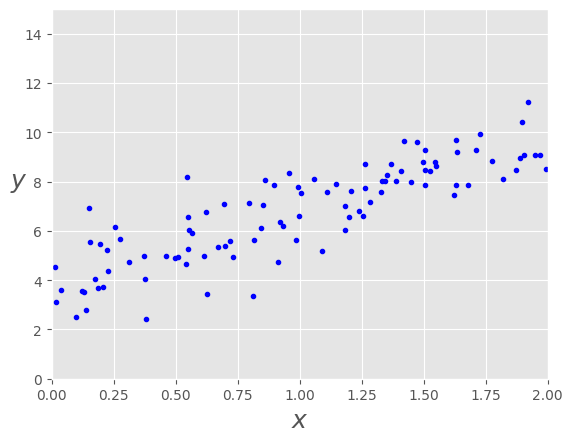

In [9]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

It is clear that Y has a nice linear relatioship with X. Data is simple as it has only one independent variable. So it is simple linear regression problem. Mathematically it can be expressed as

\begin{equation}
y = \theta_0+\theta_1 x
\end{equation}

and we can solve the equation for a and b as follows

\begin{equation}
\theta = \frac {\sum_{i=1}^n (x_i-\bar{x})(y_i - \bar{y})} {\sum_{i=1}^n (x_i-\bar{x})}
\end{equation}


\begin{equation}
\theta_0 = \bar{y}-\theta_1\bar{x}
\end{equation}

Where $\bar{x}$ and $\bar{y}$ are mean of $x$ and $y$ respectively. This is called analytical method of solving the equation. 

There is normal equation solution also which is given by

\begin{equation}
\theta_{best} = (X^T X)^{-1}X^T y
\end{equation}

If the number of features in $X$ starts increasing then the load on CPU to do the matrix multiplication would start increasing and if the number of features are really huge like a million features (in case of NLP) then it would almost become infeasible for computer to solve this. Moreover, $x$ may be rank deficient in case features are correlated then inverse of matrix is not defined. This is where gradient descent comes to rescue. 

In gradient descent we move in the direction of the greatest gradient. Terms used:

Size of step  = learning rate

Measure = Cost Function


Direction of steps = Gradient. 


##### Cost Function & Gradients

The equation for calculating cost function and gradients are as shown below. Please note the cost function is for Linear regression. For other algorithms the cost function will be different and the gradients would have  to be derived from the cost functions

Mathematically:

**Cost**

\begin{equation}
J(\theta) = \frac {1} {2n} {\sum_{i=1}^n ({h(\theta)}^{i}-y^i)^2} 
\end{equation}

**Gradient**
\begin{equation}
\frac {\partial J(\theta)} {\partial \theta_j} = \frac {1} {n} {\sum_{i=1}^n ({h(\theta)}^{i}-y^i).X_j^i} 
\end{equation}

Where $n$ is the number of observations




we follow the following procedure to find the thetas.

We start with a random Theta vector and predict the h(Theta), then derive cost using the above equation which stands for Mean Squared Error(MSE). Remember we try to minimize cost we would need to know our next step (or Theta). The partial derivative is something that can help to find the Theta for next iteration. For simple regression we need to calculate $\theta_0$ and $\theta_1$. If we had multiple features then we would have mutliple Thetas. Here is the general formula:

**Gradients**

\begin{equation}
\theta_0 := \theta_0 - \alpha (\frac {1} {n} {\sum_{i=1}^n ({h(\theta)}^{i}-y^i).X_0^i} )
\end{equation}

\begin{equation}
\theta_1 := \theta_1 - \alpha (\frac {1} {n} {\sum_{i=1}^n ({h(\theta)}^{i}-y^i).X_1^i}) 
\end{equation}

\begin{equation}
\theta_2 := \theta_2 - \alpha (\frac {1} {n} {\sum_{i=1}^n ({h(\theta)}^{i}-y^i).X_2^i}) 
\end{equation}

\begin{equation}
\theta_j := \theta_j -\alpha (\frac {1} {n} {\sum_{i=1}^n ({h(\theta)}^{i}-y^i).X_j^i}) 
\end{equation}

Where $\alpha$ is the Learning rate. 

Now we have all the formulas we are ready to write our program for gradient descent. 


In [10]:
def  cost_fun(theta,X,y):
    '''
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1)) only for simple regression
    
    where:
        j is the no of features
    '''
    
    n = len(y)
    
    predictions = X.dot(theta)
   # cost = (1/2*n) * np.sum(np.square(predictions-y))
    cost = (1/2*n) * np.sum((predictions-y)**2)
    return cost


In [11]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    n = len(y)
    num_theta = X.shape[1]
    cost_history = np.zeros(iterations)
   # theta_history = np.zeros((iterations,2))
    theta_history = np.zeros((iterations,num_theta))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/n)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cost_fun(theta,X,y)
        
    return theta, cost_history, theta_history    
    

##### Analytical way of Linear Regression¶


In [12]:
x_bar = np.mean(X)
y_bar = np.mean(y)

In [13]:
X_1 = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_1.T.dot(X_1)).dot(X_1.T).dot(y)
print(theta_best)

[[3.79487728]
 [3.00196389]]


<h5>This is close to our real thetas 4 and 3. It cannot be accurate due to the noise I have introduced in data

In [16]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.79487728],
       [9.79880506]])

<h5>Let's plot prediction line with calculated:theta

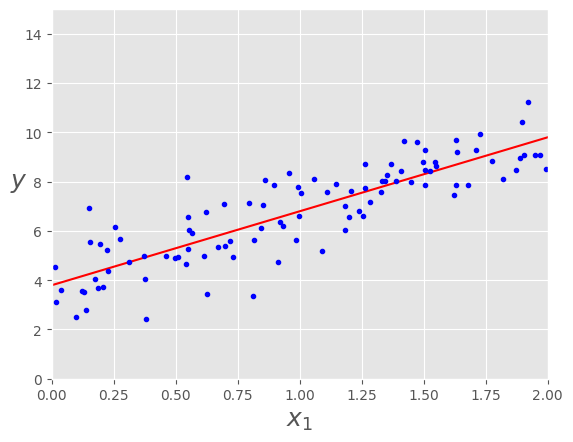

In [17]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

##### Gradient Descent

Let's start with 1000 iterations and a learning rate of 0.01. Start with theta from a Gaussian distribution

In [18]:
lr =0.01
n_iter = 1000

X_b = np.c_[np.ones((len(X),1)),X]
print(X_b)
num_theta = X_b.shape[1]

theta = np.random.randn(num_theta,1)    ## Initial value of theta

theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

[[1.         1.99248524]
 [1.         0.69634193]
 [1.         1.3310872 ]
 [1.         1.14714832]
 [1.         1.28411747]
 [1.         0.2078248 ]
 [1.         0.62501029]
 [1.         1.5479852 ]
 [1.         1.19869159]
 [1.         0.91315559]
 [1.         0.55420302]
 [1.         1.38832913]
 [1.         1.00528612]
 [1.         0.01652473]
 [1.         0.27607693]
 [1.         0.31190099]
 [1.         0.37635663]
 [1.         0.22515057]
 [1.         0.61523604]
 [1.         1.96904416]
 [1.         1.62034902]
 [1.         1.34983592]
 [1.         1.54533909]
 [1.         1.0898534 ]
 [1.         0.09974954]
 [1.         0.85977954]
 [1.         0.9204016 ]
 [1.         0.99572386]
 [1.         1.88924584]
 [1.         0.3796304 ]
 [1.         1.26229048]
 [1.         1.89544634]
 [1.         0.55127927]
 [1.         1.87387966]
 [1.         1.52438292]
 [1.         1.63164873]
 [1.         1.72628057]
 [1.         0.25657369]
 [1.         0.03654395]
 [1.         0.73081335]


Let's plot the cost history over iterations

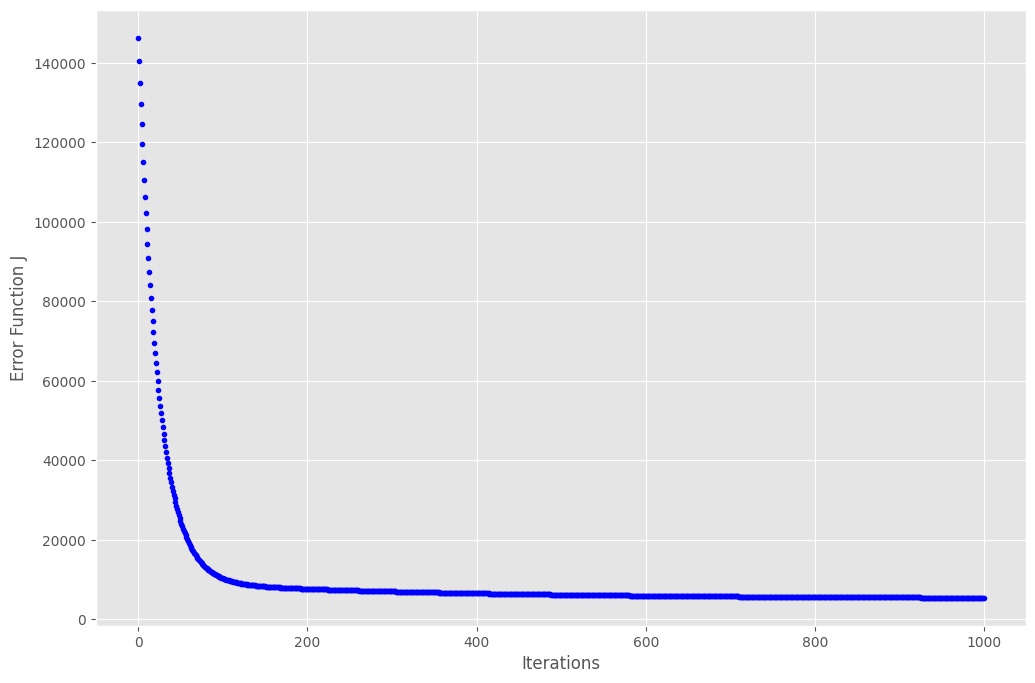

In [19]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error Function J')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

After around 150 iterations the cost is flat so the remaining iterations  are not needed or will not result in any further optimization. Let us zoom in till iteration 200 and see the curve

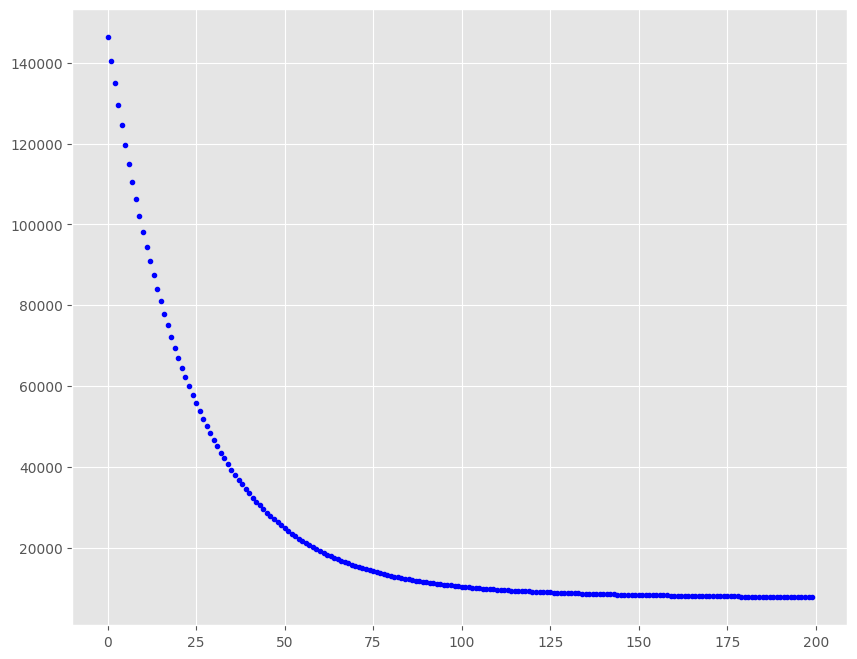

In [20]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

It is worth while to note that the cost drops faster initially and then the gain in cost reduction is not as much

 It could be great to see the effect of different learning rates and iterations together

Let us  build a function which can show the effects together and also show how gradient decent actually is working

### CHECK IT

In [21]:
def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X,y,'b.')
     #num_theta = X.shape[1]
     #theta = np.random.randn(num_theta,1)
     theta = np.random.randn(2,1)
     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')  

Plot the graphs for different iterations and learning rates combination

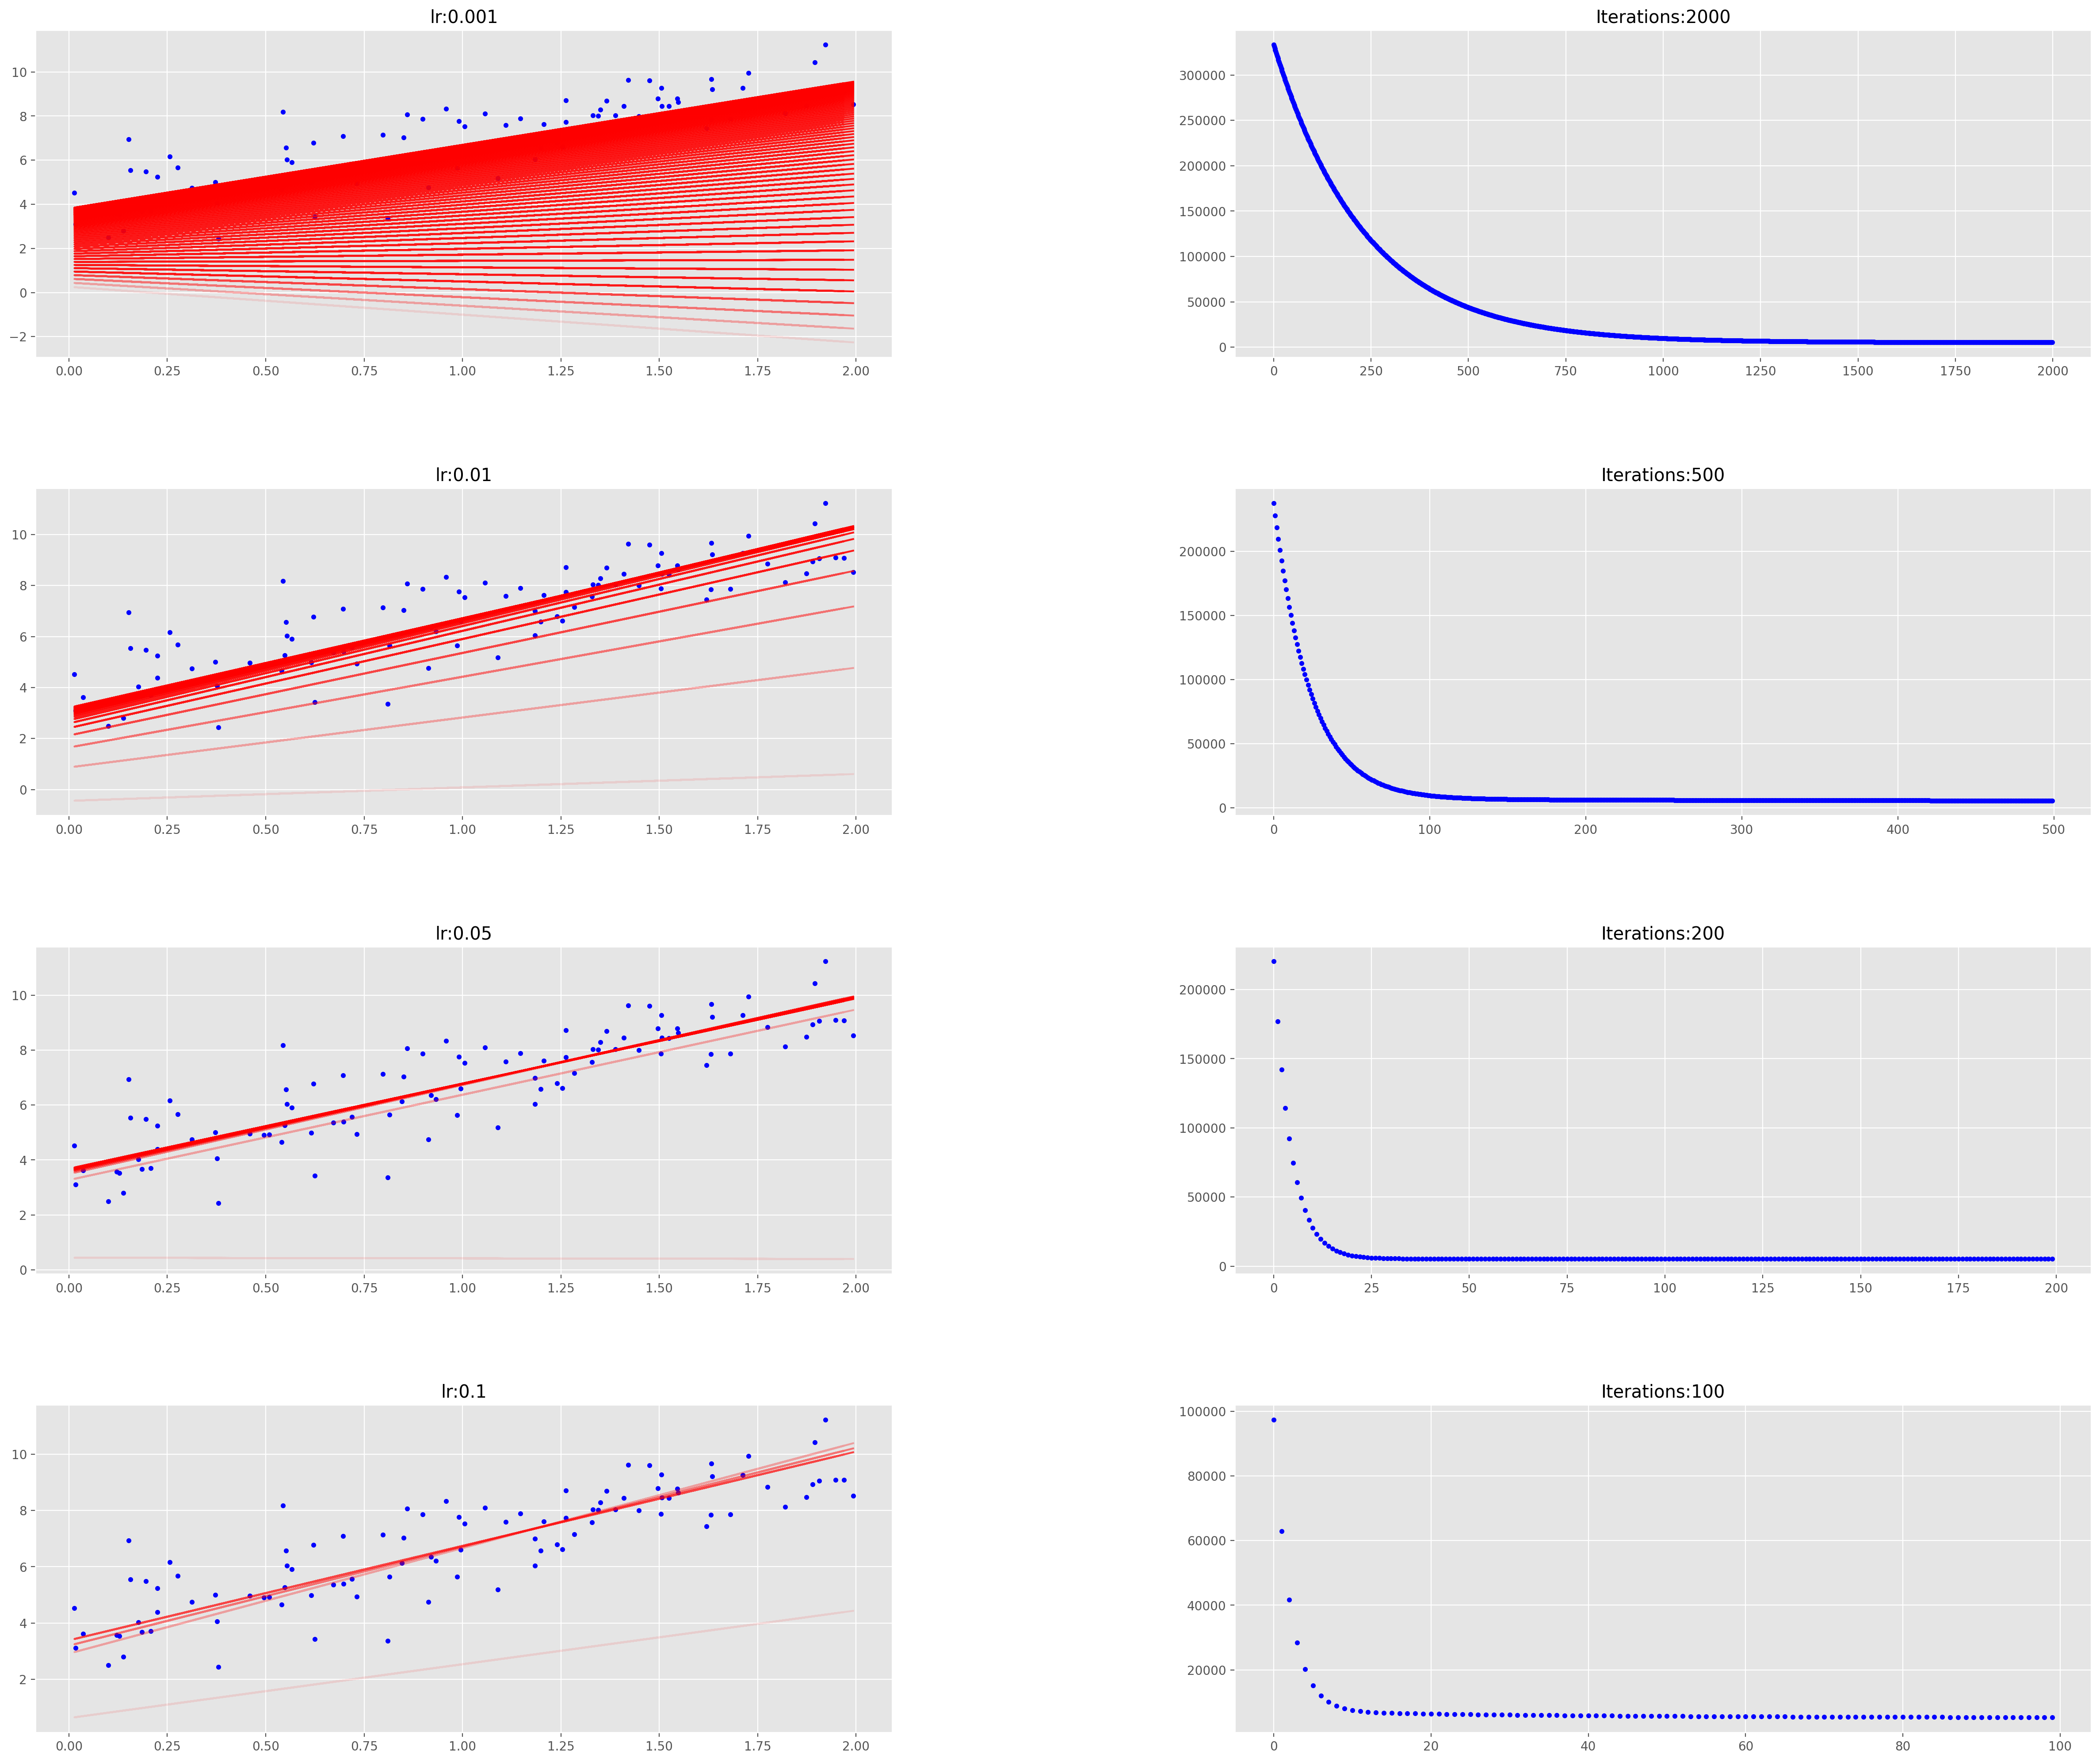

In [22]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)
    

See how useful it is to visualize the effect of learning rates and iterations on gradient descent. The red lines show how the gradient descent starts and then slowly gets closer to the final value

#### You can always plot Indiviual graphs to zoom in

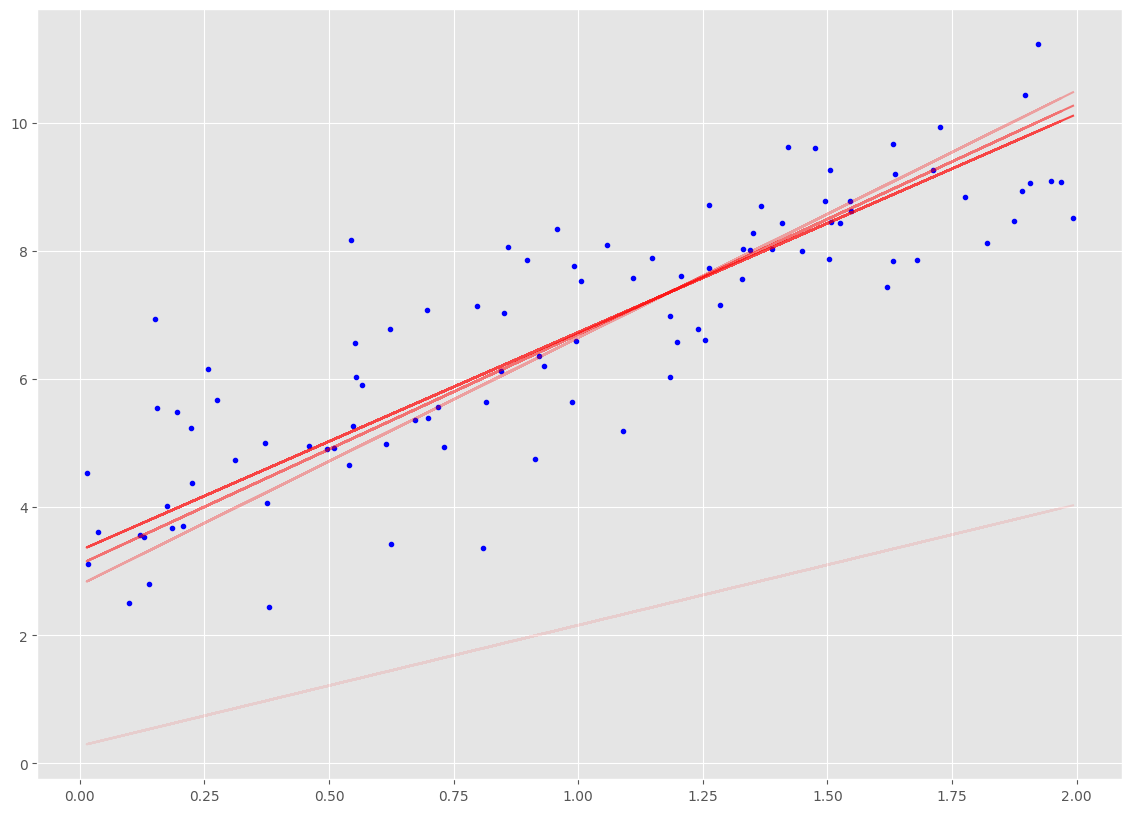

In [23]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(100,0.1,ax)

Batch Gradient Descent is when we sum up over all examples on each iteration when performing the updates to the parameters.
The main advantages of batch gradient descent:

- We can use fixed learning rate during training without worrying about learning rate decay.
- It has straight trajectory towards the minimum and it is guaranteed to converge in theory to the global minimum if the loss function is convex and to a local minimum if the loss function is not convex.
- It has unbiased estimate of gradients. The more the examples, the lower the standard error.


The main disadvantages:

- Even though we can use vectorized implementation, it may still be slow to go over all examples especially when we have large datasets.
- Each step of learning happens after going over all examples where some examples may be redundant and don’t contribute much to the update.

# Stochastic Gradient Descent

In gradient descent algorithm we did the gradient on each observation one by one, in stochastic gradient descent we can choose the random observations randomly. It is called **stochastic** because samples are selected randomly instead of as s single group. There are a few things to note about this:

- With every GD iteration, you need to shuffle the training set and pick a random training example from that.
- Since, you’re only using one training example, your path to the local minima will be very noisey like a drunk man after having one too many drinks.

It shares most of the advantages and the disadvantages with mini-batch version. Below are the ones that are specific to SGD:

- It adds even more noise to the learning process than mini-batch that helps improving generalization error. However, this would increase the run time.
- We can’t utilize vectorization over 1 example and becomes very slow. Also, the variance becomes large since we only use 1 example for each learning step.


In [ ]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    n = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(n):
            rand_ind = np.random.randint(0,n)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/n)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cost_fun(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [ ]:
lr =0.5
n_iter = 50

#theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]

num_theta = X_b.shape[1]
theta = np.random.randn(num_theta,1)

theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

We implemented the gradient descent for linear regression but you can do it for any other algorithm e.g., Neural networks, logistic regression etc. What would change is the cost function and the way you calculate gradients. So we need to define our cost function and gradient calculation.

There are additional concepts that are good to be aware of. A few of these include:

- **Convexity** In our linera regression problem, there was only one minimum. Our error surface was ocnvex, Regardless of where we started, we would arrive at the absolute minimum or in other words global minimum. In practice ths is not the case. It is possible to have a problem with local minima that a gradient search can get stuck in There are several approcahes to mitigate this (e.g., stochastic gradient which we have discussed)

- **Performance**  – We used vanilla gradient descent with a learning rate of 0.01 in the above example, and ran it for 1000 iterations. There are approaches such a line search, that can reduce the number of iterations required. For the above example, line search reduces the number of iterations to arrive at a reasonable solution from several thousand to around 50.

- **Convergence** – We didn’t talk about how to determine when the search finds a solution or we need to stop. There are several critia which can be followed. One of them is typically by looking for small changes in error iteration-to-iteration (e.g., where the gradient is near zero).


May be discuss challenges from 
References:

https://towardsdatascience.com/gradient-descent-algorithm-and-its-variants-10f652806a3

https://colab.research.google.com/gist/sagarmainkar/5cfa33898a303f895da5100472371d91/notebook.ipynb#scrollTo=erQifW90Y9cy